<a href="https://colab.research.google.com/github/Caseyshea96/Caseyshea96.github.io/blob/main/Geog312Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Casey Shea
*   Geog 312 Final
*   Dr. Sokol

**1. Data Manipulation (5 points): Write a Python function that takes a list of lists representing
points (latitude, longitude) and returns the average latitude and average longitude.**


In [313]:
def average_coordinates(points):

  numpoints = len(points)
  total_lat = sum(point[0] for point in points)
  total_long = sum(point[1] for point in points)

  average_lat = total_lat / numpoints
  average_long = total_long / numpoints

  return average_lat, average_long

pointslist = [
      [43, 25],
      [23, 42],
      [32, 65]
  ]
result = average_coordinates(pointslist)
print("Average Latitude", result[0])
print("Average Longitude", result[1])

Average Latitude 32.666666666666664
Average Longitude 44.0


**2. Conditional Statements (5 points): Write a Python program that reads a CSV file containing
elevation data for points. The program should then identify and print the points with an elevation
above a user-specified threshold.**

In [314]:
import csv

def filter_points_above_threshold(file_path, threshold):
    try:
        with open(file_path, 'r') as csv_file:
            reader = csv.reader(csv_file)
            header = next(reader)

            elevation_index = header.index('elev')

            above_threshold_points = []

            for row in reader:
                elevation = float(row[elevation_index])
                if elevation > threshold:
                    above_threshold_points.append(row)

            return above_threshold_points

    except FileNotFoundError:
        print("Error: File not found.")
        return []
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

if __name__ == "__main__":
    file_path = '/content/2005-contour-elevations-gis-data-geojson-4.csv'

    try:
        threshold = float(input("Enter the elevation threshold: "))
    except ValueError:
        print("Invalid input, please enter a numeric value for the threshold.")
        exit()

    result = filter_points_above_threshold(file_path, threshold)

    if result:
        print(f"Points with elevation above {threshold}:")
        for point in result:
            print(point)
    else:
        print("No points found or an error occurred.")


Enter the elevation threshold: 800
Points with elevation above 800.0:
['3078002.775', '1416001.44', 'ContourElevations.1', '1', 'g40lc', '1', '806', 'contour', '[ 3078000.000000, 1416000.000000, 3078004.350000, 1416004.531700 ]']
['3078182.49', '1416173.2499999', 'ContourElevations.2', '2', 'g40lc', '2', '818', 'contour', '[ 3078000.000000, 1416000.000000, 3078203.600000, 1416350.790000 ]']
['3078165.05', '1416168.27', 'ContourElevations.3', '3', 'g40lc', '3', '816', 'contour', '[ 3078000.000000, 1416000.000000, 3078184.010000, 1416332.320000 ]']
['3078115.33', '1416130.42', 'ContourElevations.4', '4', 'g40lc', '4', '810', 'index', '[ 3078000.000000, 1416000.000000, 3078137.060000, 1416259.410000 ]']
['3078002.4299999', '1416012.2963001', 'ContourElevations.5', '5', 'g40lc', '5', '808', 'contour', '[ 3078000.000000, 1416000.000000, 3078016.170000, 1416016.642600 ]']
['3080805.935', '1416304.5', 'ContourElevations.6', '6', 'g40lc', '6', '936', 'contour', '[ 3080614.590000, 1416000.00000

data from https://data.world/city-of-bloomington/457b77d4-0c10-43a0-bd59-aef2923ff26f

**3. Loops (5 points): Write a Python program that iterates through a dictionary containing county
names and their corresponding population densities. The program should calculate and print the
total population for all counties.**

In [315]:
def calculate_total_population(population_dict):
    total_population = 0

    for county, density in population_dict.items():
        total_population += density

    return total_population

if __name__ == "__main__":
    county_population = {
        'Bronx': 32900.43,
        'Kings': 35367.13,
        'New York': 69464.43,
        'Queens': 20553.97,
        'Albany': 581.87,
        'Allegany': 47.55,
        'Broome': 284.23,
        'Cattaraugus': 61.39,
        'Cayuga': 115.71,
        'Chautauqua': 127.24,

    }

    total_population = calculate_total_population(county_population)

    print(f"Total population for all counties: {total_population}")

Total population for all counties: 159503.94999999998


data from https://www.kaggle.com/datasets/mitchjohnson2012/us-population-density-by-county/data

**4. Functions with Arguments (5 points): Write a Python function that takes a shapefile path as
input and returns its area in square kilometers**

In [316]:
import geopandas as gpd

def calculate_shapefile_area(shapefile_path):
    try:
        gdf = gpd.read_file(shapefile_path)

        gdf = gdf.to_crs(epsg=3395)

        total_area_km2 = gdf.geometry.area.sum() / 1e6

        return total_area_km2

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

if __name__ == "__main__":
    shapefile_path = '/content/drive/MyDrive/Geographic Data Handling and Mapping/States_shapefile-shp/States_shapefile.shp'

    area = calculate_shapefile_area(shapefile_path)

    if area is not None:
        print(f"Total area of the shapefile: {area:.2f} square kilometers")
    else:
        print("Error calculating the area.")


Total area of the shapefile: 21297299.85 square kilometers


**5. Error Handling (5 points): Write a Python program that attempts to read a raster file. If the file
is not found or invalid, the program should print a helpful error message and gracefully exit.**


In [317]:
from osgeo import gdal

def read_raster_file(file_path):
    try:
        raster_dataset = gdal.Open(file_path)

        if raster_dataset is None:
            raise Exception("Invalid raster file or format.")

        print("Raster file successfully opened.")

    except FileNotFoundError:
        print(f"Error: Raster file not found at {file_path}.")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        if raster_dataset is not None:
            raster_dataset = None

if __name__ == "__main__":
    raster_file_path = '/content/drive/MyDrive/Geographic Data Handling and Mapping/nsrdb3_dni.tif'

    read_raster_file(raster_file_path)


Raster file successfully opened.


**1. Problem-Solving (10 points): You are tasked with creating a program to identify areas suitable
for building a new solar farm. You have access to datasets for land cover, slope, and solar
radiation. Describe the workflow of your program, including data preparation, analysis steps, and
final output.bold text**

The first step in creating this program would be to acquire all of the data and organize it in appropriate directories to simplify workflow. Next, I would use the merge function in pandas to combine the data into one cohesive file. After that, I would identify the parameters that I am looking for in a potential area for the solar farm. Finally, I would write the code to import the data and visualize it using leafmaps or another spatial analysis tool in python. From there, it would be much easier to identify the most suitable area for the farm, and additional tools could be used.

**2. Critical Thinking (10 points): You are given a shapefile of earthquake epicenters and a raster
file of population density. Explain how you would use Python and GIS libraries to identify the
areas most vulnerable to earthquake damage, considering both population density and proximity
to epicenters.**

The first step in solving this problem would be to import both datasets. I would ensure they use the same coordinate system, and overlay one over another using leafmaps or another gis program in python. Next, I would add a buffer to the epicenter points to identify areas most affected by the earthquakes. From there it would be easy to see where the high population density and earthquake epicenters align. To further analyze these areas, parameters could be set to define vulnerability checking whether an area is in an epicenter buffer and also contains a high population density.

**3. Critical Thinking (10 points): You are tasked with creating a visualization that shows the
impacts of climate change on Tennessee agricultural production. You are given a dataset for
precipitation, temperature, and crop output. How would you go about visualizing this in python
and what analyses would need to be done to measure these impacts?**

To visualize and measure the impacts of climate change on Tennessee agricultural production, the first thing I would do is load the dataset and ensure it is formatted correctly so it can be read by programs. I would create several maps showing the precipitation, temperature and total output for the year with a different map for each year. By comparing these maps visually you could easily draw a correlation between crop output and climate and see which direction it is trending.

**4. Geospatial Analysis (10 points): You have a shapefile of national parks and a raster file of
deforestation rates. Design a Python program to calculate the total area of deforestation within
each national park and identify the park with the highest deforestation rate.**

The first step in analyzing the total area of deforestation in each national park would be to load the shapefile and raster file into python and ensure proper formatting and coordinate systems. Next, I would visualize the parks using a mapping program in python. Each national park would need to be clipped to create individual, seperate rasters, then the total area could be calculated. This would make it easy to compare the rate of deforestation for each individual park.

**1. Shapefile Visualization (10 points): Write a Python program to read a shapefile. Create a map
showing the data points as colored polygons (anything other than circles). Each data point should
be colored based on its magnitude (e.g., green for small (low), yellow for medium (average), red
for large (high)).**


In [318]:
!pip install leafmap

In [319]:
import geopandas as gpd
import folium

def color_by_magnitude(magnitude):
    if magnitude is None or not isinstance(magnitude, (int, float)):
        return 'gray'

    if magnitude < 3:
        return 'green'
    elif magnitude < 6:
        return 'yellow'
    else:
        return 'red'

def plot_shapefile(shapefile_path):
    gdf = gpd.read_file(shapefile_path)

    m = folium.Map(location=[gdf['latitude'].mean(), gdf['longitude'].mean()], zoom_start=4)

    for index, row in gdf.iterrows():
        magnitude = row['mag']
        color = color_by_magnitude(magnitude)

        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=f"Magnitude: {magnitude}"
        ).add_to(m)

    m.save(outfile='map4.html')


shapefile_path = '/content/drive/MyDrive/USGS_-_Recent_Earthquakes_by_Magnitude/USGS_-_Recent_Earthquakes_by_Magnitude.shp'
plot_shapefile(shapefile_path)


data from https://hub.arcgis.com/datasets/CalEMA::usgs-recent-earthquakes-by-magnitude/explore?layer=0&location=37.123196%2C-122.126351%2C14.96

**2. Raster Processing and Visualization (10 points): Write a Python program to read a raster file of
precipitation data and apply a colormap to visualize the temperature variations. Add a legend to
the map and ensure clear labels for axes and title.
Hint: Use the precipitation dataset already provided to you**

In [320]:
!pip install rasterio matplotlib

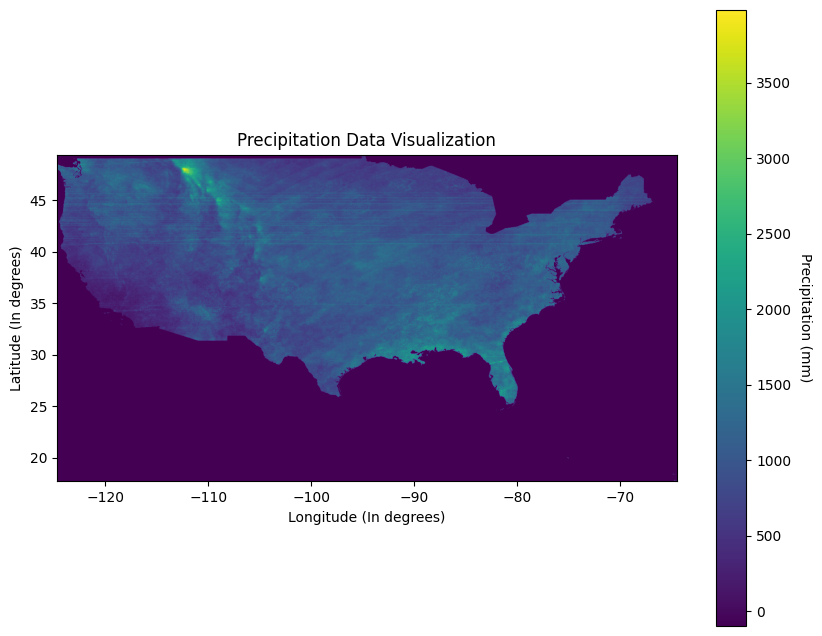

In [321]:
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def visualize_precipitation(raster_file):
    with rasterio.open(raster_file) as src:
        precipitation_data = src.read(1)

        transform = src.transform
        x_size, y_size = src.width, src.height

        x_coords = [transform[2] + i * transform[0] for i in range(x_size)]
        y_coords = [transform[5] + i * transform[4] for i in range(y_size)]

        cmap = plt.get_cmap('viridis')

        plt.figure(figsize=(10, 8))
        plt.imshow(precipitation_data, cmap=cmap, extent=[min(x_coords), max(x_coords), min(y_coords), max(y_coords)])

        cbar = plt.colorbar(orientation='vertical')
        cbar.set_label('Precipitation (mm)', rotation=270, labelpad=15)

        plt.title('Precipitation Data Visualization')
        plt.xlabel('Longitude (In degrees)')
        plt.ylabel('Latitude (In degrees)')

        plt.show()

raster_file = '/content/drive/MyDrive/CCS_United_States_2023-12-13092147am/CCS_1y2021.tif'
visualize_precipitation(raster_file)


data from https://chrsdata.eng.uci.edu/

**3. Cartographic Design (10 points): Design a map showing the distribution of solar farms in
west, middle, and east Tennessee. Create a raster layer that summarizes the total energy
generated from the solar farms in each of these regions (it can be one raster layer). Discuss which
region has the most solar production and why.**

In [322]:
import geopandas as gpd
from shapely.geometry import box
points_gdf = gpd.read_file('/content/drive/MyDrive/TIGER_Line_2018_Tennessee_Counties-shp/tl_2018_tn_county.shp')

In [323]:
east_total = east_mask['Total_MW'].sum()
west_total = west_mask['Total_MW'].sum()
middle_total = middle_mask['Total_MW'].sum()

print(east_total)
print(middle_total)
print(west_total)


6969.9
9943.300000000001
12765.699999999997


In [324]:
import geopandas as gpd
from shapely.geometry import box
from shapely.geometry import Point
import rasterio
from rasterio.transform import from_origin
import numpy as np

points_gdf = gpd.read_file('/content/drive/MyDrive/TIGER_Line_2018_Tennessee_Counties-shp/tl_2018_tn_county.shp')

geometry = [Point(lon, lat) for lon, lat in zip(points_gdf['Longitude'], points_gdf['Latitude'])]
points_gdf = gpd.GeoDataFrame(points_gdf, geometry=geometry, crs="EPSG:4326")

east_bbox = box(-85, 35, -81, 36.5)
west_bbox = box(-90, 35, -85, 36.5)
middle_bbox = box(-88, 35, -85, 36.5)

def create_raster(region_mask, filename):
    bbox = region_mask.total_bounds

    raster_width = int((bbox[2] - bbox[0]) / pixel_size)
    raster_height = int((bbox[3] - bbox[1]) / pixel_size)

    region_raster = rasterio.open(filename, 'w', driver='GTiff', height=raster_height, width=raster_width, count=1, dtype='float32', crs=points_gdf.crs, transform=from_origin(bbox[0], bbox[3], pixel_size, pixel_size))

    data = np.full((raster_height, raster_width), region_mask['Total_MW'].sum(), dtype=np.float32)

    region_raster.write(data, 1)
    region_raster.close()

east_mask = points_gdf[points_gdf.intersects(east_bbox)]
west_mask = points_gdf[points_gdf.intersects(west_bbox)]
middle_mask = points_gdf[points_gdf.intersects(middle_bbox)]

create_raster(east_mask, '/content/drive/MyDrive/east_raster.tif')
create_raster(middle_mask, '/content/drive/MyDrive/middle_raster.tif')
create_raster(west_mask, '/content/drive/MyDrive/west_raster.tif')


I couldn't get a map to display these files correctly. However, I do know that the West region generates the highest total energy of the three regions by using this function to add the "Total_MW" columns of each of the points in the defined regions.

east_total = east_mask['Total_MW'].sum()
west_total = west_mask['Total_MW'].sum()
middle_total = middle_mask['Total_MW'].sum()

data from https://hub.arcgis.com/datasets/myUTK::tiger-line-2018-tennessee-counties/explore, https://www.arcgis.com/home/item.html?id=45cdf0f5dcd243aebb16f84460077f7e